In [1]:
import os
os.chdir(os.getcwd())

In [2]:
# 1. Data Loading

In [3]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('train.csv')
df_train.dropna(subset = ['launch_speed'], inplace=True)
df_train.dropna(subset = ['launch_angle'], inplace=True)
df_train.head()

,bip_id,game_date,home_team,away_team,batter_team,batter_name,pitcher_name,batter_id,pitcher_id,is_batter_lefty,...,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,launch_speed,launch_angle,is_home_run
0,1,2020-08-26,ARI,COL,COL,"arenado, nolan","ray, robbie",571448,592662,0,...,1,0,1,2,-0.15,1.97,87.8,108.9,9.0,0
2,3,2020-08-10,COL,ARI,COL,"arenado, nolan","ray, robbie",571448,592662,0,...,3,0,1,2,-0.54,1.75,86.5,75.0,49.0,0
3,4,2020-08-26,ARI,COL,COL,"blackmon, charlie","ray, robbie",453568,592662,1,...,1,0,0,2,-0.42,3.15,86.7,90.6,54.0,0
5,6,2020-08-10,COL,ARI,COL,"blackmon, charlie","ray, robbie",453568,592662,1,...,3,0,2,2,-0.99,1.52,86.2,66.7,27.0,0
9,10,2020-08-26,ARI,COL,COL,"butera, drew","ray, robbie",460077,592662,0,...,4,1,1,1,-0.44,2.33,85.5,89.7,55.0,0


In [4]:
X_train = df_train[['plate_x','plate_z', 'pitch_name']].values
Y_train = df_train['is_home_run'].values

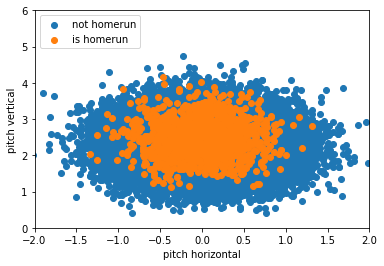

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_train[Y_train == 0, 0],
            X_train[Y_train == 0, 1], 
            label='not homerun',)
plt.scatter(X_train[Y_train == 1, 0],
            X_train[Y_train == 1, 1], 
            label='is homerun',)

plt.xlabel('pitch horizontal')
plt.ylabel('pitch vertical')
plt.xlim([-2, 2])
plt.ylim([0, 6])
plt.legend(loc='upper left')
plt.show()

In [6]:
df_train["same_hand_players"] = np.where(df_train['is_batter_lefty'] == df_train['is_pitcher_lefty'], 1, 0)

In [7]:
from sklearn.model_selection import train_test_split
feature_columns = ['launch_speed', 'launch_angle',
                   'pitch_name', 'same_hand_players',
                   'plate_x', 'plate_z']
X = df_train[feature_columns]
dict = {"4-Seam Fastball": 1, 
        "Sinker": 2, 
        "Slider": 3, 
        "Changeup": 4, 
        "Curveball": 5, 
        "Cutter": 6, 
        "Knuckle Curve": 7,
        "Split-Finger": 8,
        "Forkball": 9}
X = X.replace({'pitch_name': dict})
y = df_train.is_home_run

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1, stratify=y)


In [8]:
# 2. Decision Tree with Grid Search

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1)
params = {
    'min_samples_split': [3, 4, 5],
    'max_depth': [2, 4, 6, 16, 32]
}
grid = GridSearchCV(estimator=tree,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2)
grid.fit(X_train, y_train)
grid.best_score_

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END ...................max_depth=2, min_s

[CV] END ..................max_depth=16, min_samples_split=4; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=4; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=5; total time=   0.0s
[CV] END ..................m

0.9708378814549514

In [10]:
grid.best_params_

{'max_depth': 6, 'min_samples_split': 3}

In [11]:
print(f"Training Accuracy: {grid.best_estimator_.score(X_train, y_train)*100:0.3f}")
print(f"Test Accuracy: {grid.best_estimator_.score(X_test, y_test)*100:0.3f}")

Training Accuracy: 97.509
Test Accuracy: 97.023


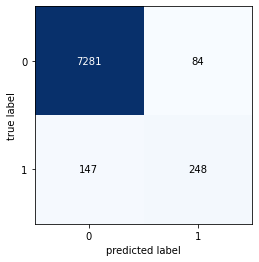

In [12]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
y_pred = grid.best_estimator_.predict(X_test)
cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [13]:
# 3. K-Nearest Neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
print(f"Training Accuracy: {knn.score(X_train, y_train)*100:0.3f}")
print(f"Test Accuracy: {knn.score(X_test, y_test)*100:0.3f}")

Training Accuracy: 98.106
Test Accuracy: 96.933


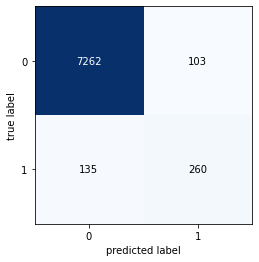

In [26]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [27]:
# 4. XGBoost

In [28]:
from xgboost import XGBClassifier
boost = XGBClassifier(random_state=123, verbosity=0, use_label_encoder=False)
boost.fit(X_train, y_train)
print(f"Training Accuracy: {boost.score(X_train, y_train)*100:0.3f}")
print(f"Test Accuracy: {boost.score(X_test, y_test)*100:0.3f}")

Training Accuracy: 99.619
Test Accuracy: 97.036


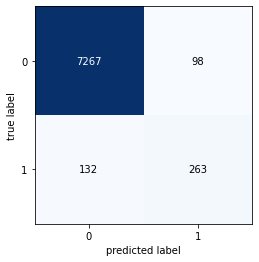

In [19]:
y_pred = boost.predict(X_test)
cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()